<a href="https://colab.research.google.com/github/HanifaElahi/Mediapipe/blob/main/Face_Detection_with_Mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Face Detection***

---
* MediaPipe Face Detection is an ultrafast face detection solution that comes with 6 landmarks and multi-face support. 
* It is based on BlazeFace, a lightweight and well-performing face detector tailored for mobile GPU inference. 
*The detector’s super-realtime performance enables it to be applied to any live viewfinder experience that requires an accurate facial region of interest as an input for other task-specific models, such as 3D facial keypoint or geometry estimation (e.g., MediaPipe Face Mesh), facial features or expression classification, and face region segmentation. 
*BlazeFace uses a lightweight feature extraction network inspired by, but distinct from MobileNetV1/V2, a GPU-friendly anchor scheme modified from Single Shot MultiBox Detector (SSD), and an improved tie resolution strategy alternative to non-maximum suppression. 

##Detection##

Collection of detected faces, where each face is represented as a detection proto message that contains a bounding box and 6 key points (right eye, left eye, nose tip, mouth center, right ear tragion, and left ear tragion). The bounding box is composed of xmin and width (both normalized to [0.0, 1.0] by the image width) and ymin and height (both normalized to [0.0, 1.0] by the image height). Each key point is composed of x and y, which are normalized to [0.0, 1.0] by the image width and height respectively.



# ***Installation***

In [ ]:
!pip install mediapipe

# ***Uploading Images***

In [ ]:
# Upload images that contain face(s) within 2 meters from the camera.
from google.colab import files
uploaded_short_range = files.upload()

# Upload images that contain face(s) within 5 meters from the camera.
from google.colab import files
uploaded_full_range = files.upload()

Saving short.jpg to short.jpg


Saving long.jpg to long.jpg


# ***Importing Libraries***

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np


# ***Face Deatection with MediaPipe***

In [ ]:
#setting desired width and height of images
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

In [ ]:
#function to resize and image show

def resize_and_show(image):
  
  h, w = image.shape[:2]
  
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  
  cv2_imshow(img)


short.jpg


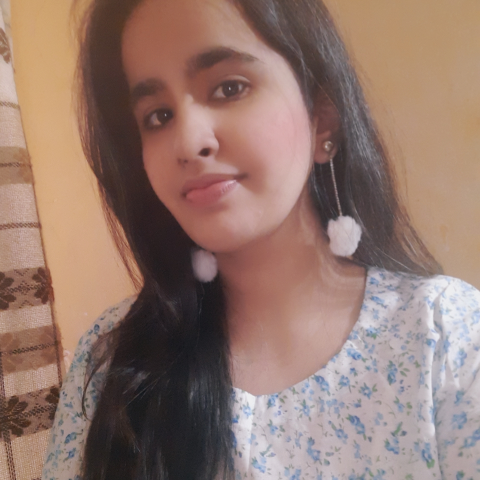

In [ ]:

# Preview the short view images

short_range_images = {name: cv2.imread(name) for name in uploaded_short_range.keys()}
for name, image in short_range_images.items():
  print(name)   
  resize_and_show(image)

long.jpg


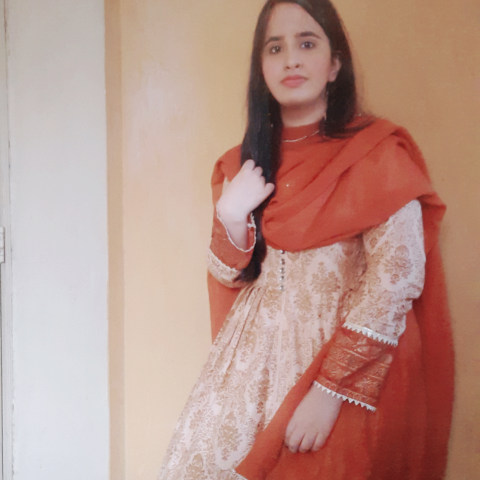

In [ ]:
# Preview the full view images

full_range_images = {name: cv2.imread(name) for name in uploaded_full_range.keys()}
for name, image in full_range_images.items():
  print(name)   
  resize_and_show(image)

In [ ]:
#initializing
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection


In [ ]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=5, circle_radius=6)

Face detections of short.jpg:


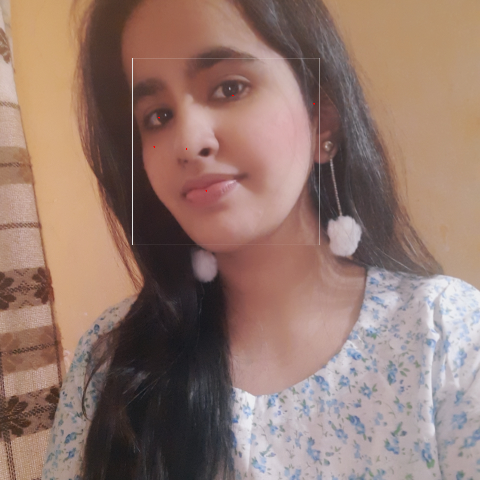

In [ ]:
# Run MediaPipe Face Detection with short range model.

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=0) as face_detection:
  for name, image in short_range_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)

Face detections of long.jpg:


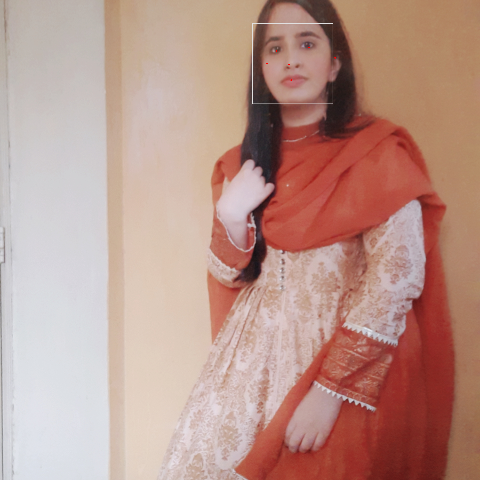

In [ ]:
# Run MediaPipe Face Detection with full range model.

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=1) as face_detection:
  for name, image in full_range_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)

Source:


---


1. https://colab.research.google.com/drive/1JaQL7MnsH1NN6i5wsloWlIYhoUC4QZOh?usp=sharing
2. https://google.github.io/mediapipe/solutions/face_detection.html